In [ ]:
!pip install mmcv-full
!git clone https://github.com/open-mmlab/mmdetection.git
!cd mmdetection; python setup.py install

In [1]:
# 언타임 다시 시작 후 아래 수행.
from mmdet.apis import init_detector, inference_detector
import mmcv

In [2]:
import glob
import xml.etree.ElementTree as ET
import pandas as pd

from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt

### Oxford Pet Dataset 다운로드
image와 annotation을 압축파일로 각각 download 수행

In [3]:
!wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz

--2021-07-10 15:10:38--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/x-gzip]
Saving to: ‘images.tar.gz’

images.tar.gz       100%[===================>] 755.23M  21.4MB/s    in 36s     

2021-07-10 15:11:14 (21.1 MB/s) - ‘images.tar.gz’ saved [791918971/791918971]

--2021-07-10 15:11:14--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19173078 (18M) [application/x-gzip]
Saving to: ‘annotations.tar.gz’

annotations.tar.gz  100%[===================>]  18.28M  11.4MB/s    in 1.6s    

2021-07-10 15:11:17 (11.4 M

In [4]:
# /content/data 디렉토리를 만들고 해당 디렉토리에 다운로드 받은 압축 파일 풀기.
!mkdir /content/data
!tar -xvf images.tar.gz -C /content/data
!tar -xvf annotations.tar.gz -C /content/data

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
annotations/trimaps/._pomeranian_180.png
annotations/trimaps/pomeranian_180.png
annotations/trimaps/._pomeranian_181.png
annotations/trimaps/pomeranian_181.png
annotations/trimaps/._pomeranian_182.png
annotations/trimaps/pomeranian_182.png
annotations/trimaps/._pomeranian_183.png
annotations/trimaps/pomeranian_183.png
annotations/trimaps/._pomeranian_184.png
annotations/trimaps/pomeranian_184.png
annotations/trimaps/._pomeranian_185.png
annotations/trimaps/pomeranian_185.png
annotations/trimaps/._pomeranian_186.png
annotations/trimaps/pomeranian_186.png
annotations/trimaps/._pomeranian_187.png
annotations/trimaps/pomeranian_187.png
annotations/trimaps/._pomeranian_188.png
annotations/trimaps/pomeranian_188.png
annotations/trimaps/._pomeranian_189.png
annotations/trimaps/pomeranian_189.png
annotations/trimaps/._pomeranian_19.png
annotations/trimaps/pomeranian_19.png
annotations/trimaps/._pomeranian_190.png
annotations/trimaps/pomeranian_190.png
annota

### 이미지 파일과 annotation 파일 살펴보기

In [5]:
!ls -lia ./data/images/Abyss*.jpg

2647897 -rwxr-xr-x 1 1001 1001 126923 Jun 18  2012 ./data/images/Abyssinian_100.jpg
2650442 -rwxr-xr-x 1 1001 1001  49023 Jun 18  2012 ./data/images/Abyssinian_101.jpg
2651518 -rwxr-xr-x 1 1001 1001 165505 Jun 18  2012 ./data/images/Abyssinian_102.jpg
2652290 -rwxr-xr-x 1 1001 1001 132937 Jun 18  2012 ./data/images/Abyssinian_103.jpg
2652440 -rwxr-xr-x 1 1001 1001  34907 Jun 18  2012 ./data/images/Abyssinian_104.jpg
2650821 -rwxr-xr-x 1 1001 1001 141823 Jun 18  2012 ./data/images/Abyssinian_105.jpg
2646980 -rwxr-xr-x 1 1001 1001 197092 Jun 18  2012 ./data/images/Abyssinian_106.jpg
2652331 -rwxr-xr-x 1 1001 1001 150955 Jun 18  2012 ./data/images/Abyssinian_107.jpg
2649272 -rwxr-xr-x 1 1001 1001 120641 Jun 18  2012 ./data/images/Abyssinian_108.jpg
2650810 -rwxr-xr-x 1 1001 1001  13601 Jun 18  2012 ./data/images/Abyssinian_109.jpg
2646438 -rwxr-xr-x 1 1001 1001  96294 Jun 18  2012 ./data/images/Abyssinian_10.jpg
2649225 -rwxr-xr-x 1 1001 1001  27734 Jun 18  2012 ./data/images/Abyssinian_1

In [6]:
!ls -lia ./data/images

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
2647724 -rwxr-xr-x 1 1001 1001   27987 Jun 18  2012 Egyptian_Mau_91.jpg
2653433 -rwxr-xr-x 1 1001 1001   31662 Jun 18  2012 Egyptian_Mau_92.jpg
2652455 -rwxr-xr-x 1 1001 1001   11833 Jun 18  2012 Egyptian_Mau_93.jpg
2648702 -rwxr-xr-x 1 1001 1001   13282 Jun 18  2012 Egyptian_Mau_94.jpg
2651442 -rwxr-xr-x 1 1001 1001   25425 Jun 18  2012 Egyptian_Mau_95.jpg
2646887 -rwxr-xr-x 1 1001 1001   22833 Jun 18  2012 Egyptian_Mau_96.jpg
2647218 -rwxr-xr-x 1 1001 1001  181499 Jun 18  2012 Egyptian_Mau_97.jpg
2649493 -rwxr-xr-x 1 1001 1001    8709 Jun 18  2012 Egyptian_Mau_98.jpg
2649699 -rwxr-xr-x 1 1001 1001   12394 Jun 18  2012 Egyptian_Mau_99.jpg
2651154 -rwxr-xr-x 1 1001 1001   48984 Jun 18  2012 Egyptian_Mau_9.jpg
2651295 -rwxr-xr-x 1 1001 1001  164254 Jun 18  2012 english_cocker_spaniel_100.jpg
2649608 -rwxr-xr-x 1 1001 1001  170083 Jun 18  2012 english_cocker_spaniel_101.jpg
2650203 -rwxr-xr-x 1 1001 1001  241519 Jun 18  2012 english_cocker_spaniel_102.

In [7]:
!cat ./data/annotations/xmls/Abyssinian_1.xml

<annotation><folder>OXIIIT</folder><filename>Abyssinian_1.jpg</filename><source><database>OXFORD-IIIT Pet Dataset</database><annotation>OXIIIT</annotation><image>flickr</image></source><size><width>600</width><height>400</height><depth>3</depth></size><segmented>0</segmented><object><name>cat</name><pose>Frontal</pose><truncated>0</truncated><occluded>0</occluded><bndbox><xmin>333</xmin><ymin>72</ymin><xmax>425</xmax><ymax>158</ymax></bndbox><difficult>0</difficult></object></annotation>


In [8]:
def get_bboxes_from_xml_tree(xml_file):
  tree = ET.parse(xml_file)
  root = tree.getroot()

  bbox_names = []
  bboxes = []

  for obj in root.findall('object'):
    box_name = obj.find('name').text

    bound_box = obj.find('bndbox')
    x1 = int(bound_box.find('xmin').text)
    y1 = int(bound_box.find('ymin').text)
    x2 = int(bound_box.find('xmax').text)
    y2 = int(bound_box.find('ymax').text)

    bbox_names.append(box_name)
    bboxes.append([x1, y1, x2, y2])
  
  return bbox_names, bboxes

In [9]:
get_bboxes_from_xml_tree('/content/data/annotations/xmls/Abyssinian_1.xml')

(['cat'], [[333, 72, 425, 158]])

### train / val / test의 image, annotation 메타 파일 보기
- train과 valid용 meta파일을 별도로 만들어줌

In [43]:
!cd /content/data/annotations; cat trainval.txt | head

Abyssinian_100 1 1 1
Abyssinian_101 1 1 1
Abyssinian_102 1 1 1
Abyssinian_103 1 1 1
Abyssinian_104 1 1 1
Abyssinian_105 1 1 1
Abyssinian_106 1 1 1
Abyssinian_107 1 1 1
Abyssinian_108 1 1 1
Abyssinian_109 1 1 1


In [44]:
pet_df = pd.read_csv('/content/data/annotations/trainval.txt', sep=' ', header=None, names=['img_name', 'class_id', ' etc1', ' etc2'])
pet_df.head()

img_name  class_id   etc1   etc2
0  Abyssinian_100         1      1      1
1  Abyssinian_101         1      1      1
2  Abyssinian_102         1      1      1
3  Abyssinian_103         1      1      1
4  Abyssinian_104         1      1      1

In [45]:
pet_df['img_name'].value_counts()

pomeranian_128            1
saint_bernard_179         1
american_bulldog_175      1
Bengal_114                1
german_shorthaired_126    1
                         ..
boxer_139                 1
Bombay_164                1
english_setter_169        1
Bombay_172                1
basset_hound_155          1
Name: img_name, Length: 3680, dtype: int64

In [46]:
pet_df['class_name'] = pet_df['img_name'].apply(lambda x: x[:x.rfind('_')])
pet_df.head()

img_name  class_id   etc1   etc2  class_name
0  Abyssinian_100         1      1      1  Abyssinian
1  Abyssinian_101         1      1      1  Abyssinian
2  Abyssinian_102         1      1      1  Abyssinian
3  Abyssinian_103         1      1      1  Abyssinian
4  Abyssinian_104         1      1      1  Abyssinian

In [47]:
train_df, val_df = train_test_split(pet_df, test_size=0.1, stratify=pet_df['class_id'], random_state=444)

In [48]:
print(train_df['class_id'].value_counts(), val_df['class_id'].value_counts())

37    90
22    90
34    90
32    90
30    90
28    90
26    90
24    90
20    90
35    90
18    90
16    90
14    90
10    90
6     90
4     90
36    90
1     90
3     90
19    90
31    90
29    90
27    90
25    90
5     90
21    90
17    90
15    90
11    90
9     90
7     90
2     90
33    89
23    87
13    86
8     86
12    84
Name: class_id, dtype: int64 37    10
36    10
17    10
16    10
15    10
14    10
13    10
11    10
10    10
9     10
8     10
7     10
6     10
5     10
4     10
3     10
2     10
18    10
19    10
20    10
21    10
35    10
34    10
33    10
32    10
31    10
30    10
29    10
28    10
27    10
26    10
25    10
24    10
22    10
1     10
12     9
23     9
Name: class_id, dtype: int64


In [49]:
train_df.head()

img_name  ...                  class_name
2809                  leonberger_168  ...                  leonberger
1740  staffordshire_bull_terrier_140  ...  staffordshire_bull_terrier
1624                     Siamese_136  ...                     Siamese
3248               saint_bernard_161  ...               saint_bernard
772               great_pyrenees_124  ...              great_pyrenees

[5 rows x 5 columns]

In [50]:
train_df = train_df.sort_values(by='img_name')
val_df = val_df.sort_values(by='img_name')

In [51]:
train_df.head()

img_name  class_id   etc1   etc2  class_name
1895    Abyssinian_1         1      1      1  Abyssinian
0     Abyssinian_100         1      1      1  Abyssinian
1     Abyssinian_101         1      1      1  Abyssinian
2     Abyssinian_102         1      1      1  Abyssinian
3     Abyssinian_103         1      1      1  Abyssinian

In [52]:
train_df['img_name'].to_csv('./data/train.txt', sep=' ', header=False, index=False)
val_df['img_name'].to_csv('./data/val.txt', sep=' ', header=False, index=False)

FileNotFoundError: ignored

In [ ]:
pet_classes_list = pet_df['class_name'].unique().tolist()
print(pet_classes_list[:5])

In [53]:
!echo 'train list #####'; cat ./data/train.txt

train list #####
cat: ./data/train.txt: No such file or directory


In [54]:
!echo ' valid list ###'; cat ./data/val.txt

 valid list ###
cat: ./data/val.txt: No such file or directory


### mmdetection의 dataset format 변환


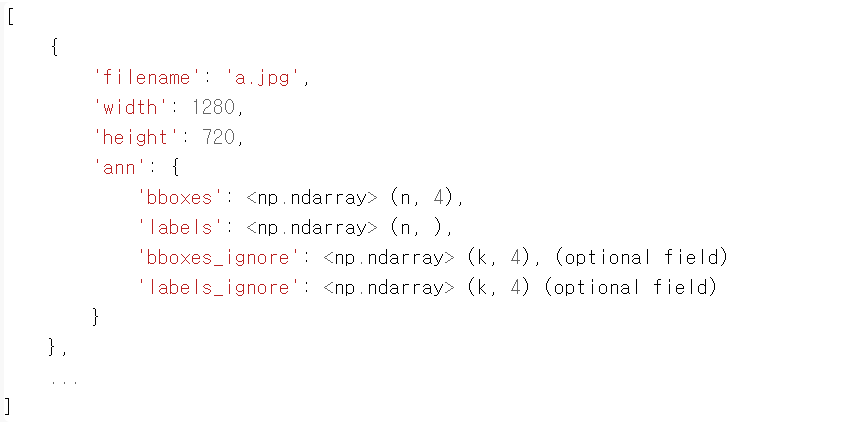

In [23]:
import copy
import os.path as osp

import mmcv
import numpy as np
import cv2

from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset

import xml.etree.ElementTree as ET

In [24]:
import xml.etree.ElementTree as ET

# 1개의 annotation 파일에서 bbox 정보 추출. 여러개의 object가 있을 경우 이들 object의 name과 bbox 좌표들을 list로 반환.
def get_bboxes_from_xml(anno_xml_file):
  anno_dir = anno_xml_file[:anno_xml_file.rfind('/')]
  xml_file = anno_xml_file[anno_xml_file.rfind('/')+1:]
  
  tree = ET.parse(anno_xml_file)
  root = tree.getroot()
  bbox_names = []
  bboxes = []

  # 파일내에 있는 모든 object Element를 찾음. 
  for obj in root.findall('object'):
    #obj.find('name').text는 cat 이나 dog을 반환     
    #bbox_name = obj.find('name').text
    # object의 클래스명은 파일명에서 추출. 
    bbox_name = xml_file[:xml_file.rfind('_')]
    
    xmlbox = obj.find('bndbox')
    x1 = int(xmlbox.find('xmin').text)
    y1 = int(xmlbox.find('ymin').text)
    x2 = int(xmlbox.find('xmax').text)
    y2 = int(xmlbox.find('ymax').text)

    bboxes.append([x1, y1, x2, y2])
    bbox_names.append(bbox_name)

  return bbox_names, bboxes

In [25]:
PET_CLASSES = pet_df['class_name'].unique().tolist()

@DATASETS.register_module(force=True)
class PetDataset(CustomDataset):
  CLASSES = PET_CLASSES

  def load_annotations(self, ann_file):
    cat2label = {key: value for value, key in enumerate(self.CLASSES)}
    image_list = mmcv.list_from_file(self.ann_file)
    
    data_infos = []

    for img_id in image_list:
      filename = '{}/{}.jpg'.format(self.img_prefix, img_id)
      image = cv2.imread(filename)
      width, height = image.shape[:2]

      data_info = {'filename': filename,
                   'width': width,
                   'height': height}
      label_prefix = self.img_prefix.replace('images', 'annotations')
      anno_xml_file = osp.join(label_prefix, 'xmls/'+ str(img_id)+'.xml')
      
      if not osp.exists(anno_xml_file):
        continue
      
      bbox_names, bboxes = get_bboxes_from_xml(anno_xml_file)
      
      gt_bboxes = []
      gt_labels = []
      gt_bboxes_ignore = []
      gt_labels_ignore = []

      for bbox_name, bbox in zip(bbox_names, bboxes):
        if bbox_name in cat2label:
          gt_bboxes.append(bbox)
          gt_labels.append(cat2label[bbox_name])
        else:
          gt_bboxes_ignore.append(bbox)
          gt_labels_ignore.append(-1)
      
      data_ann = {
          'bboxes': np.array(gt_bboxes, dtype=np.float32).reshape(-1,4),
          'labels': np.array(gt_labels, dtype=np.long),
          'bboxes_ignore': np.array(gt_bboxes_ignore, dtype=np.float32).reshape(-1,4),
          'labels_ignore': np.array(gt_labels_ignore, dtype=np.long)
      }
      data_info.update(ann=data_ann)

      data_infos.append(data_info)
  
    return data_infos



In [26]:
get_bboxes_from_xml('/content/data/annotations/xmls/Bengal_124.xml')

(['Bengal'], [[52, 47, 147, 153]])

In [27]:
# 디버깅 용도로 클래스 제작 가능

class PetDataset_imsi():
  CLASSES = PET_CLASSES

  def __init__(self, data_root, ann_file, img_prefix):
    self.data_root = data_root
    self.ann_file = osp.join(data_root, ann_file)
    self.img_prefix = osp.join(data_root, img_prefix)

    self.data_infos = self.load_annotations(self.ann_file)

  def load_annotations(self, ann_file):
    cat2label = {key: value for value, key in enumerate(self.CLASSES)}
    image_list = mmcv.list_from_file(self.ann_file)
    
    data_infos = []

    for img_id in image_list:
      filename = '{}/{}.jpg'.format(self.img_prefix, img_id)
      image = cv2.imread(filename)
      width, height = image.shape[:2]

      data_info = {'filename': filename,
                   'width': width,
                   'height': height}
      label_prefix = self.img_prefix.replace('images', 'annotations')
      anno_xml_file = osp.join(label_prefix, 'xmls/'+ str(img_id)+'.xml')
      
      if not osp.exists(anno_xml_file):
        continue
      
      bbox_names, bboxes = get_bboxes_from_xml(anno_xml_file)
      
      gt_bboxes = []
      gt_labels = []
      gt_bboxes_ignore = []
      gt_labels_ignore = []

      for bbox_name, bbox in zip(bbox_names, bboxes):
        if bbox_name in cat2label:
          gt_bboxes.append(bbox)
          gt_labels.append(cat2label[bbox_name])
        else:
          gt_bboxes_ignore.append(bbox)
          gt_labels_ignore.append(-1)
      
      data_ann = {
          'bboxes': np.array(gt_bboxes, dtype=np.float32).reshape(-1,4),
          'labels': np.array(gt_labels, dtype=np.long),
          'bboxes_ignore': np.array(gt_bboxes_ignore, dtype=np.float32).reshape(-1,4),
          'labels_ignore': np.array(gt_labels_ignore, dtype=np.long)
      }
      data_info.update(ann=data_ann)

      data_infos.append(data_info)
  
    return data_infos

In [28]:
# 디버깅 용도로 생성한 클래스를 생성하고 data_infos를 10개만 추출하여 생성된 데이터 확인. 
train_ds = PetDataset_imsi(data_root='/content/data', ann_file='train.txt', img_prefix='images')
print(train_ds.data_infos[:10])

[{'filename': '/content/data/images/Abyssinian_1.jpg', 'width': 400, 'height': 600, 'ann': {'bboxes': array([[333.,  72., 425., 158.]], dtype=float32), 'labels': array([0]), 'bboxes_ignore': array([], shape=(0, 4), dtype=float32), 'labels_ignore': array([], dtype=int64)}}, {'filename': '/content/data/images/Abyssinian_100.jpg', 'width': 500, 'height': 394, 'ann': {'bboxes': array([[151.,  71., 335., 267.]], dtype=float32), 'labels': array([0]), 'bboxes_ignore': array([], shape=(0, 4), dtype=float32), 'labels_ignore': array([], dtype=int64)}}, {'filename': '/content/data/images/Abyssinian_101.jpg', 'width': 313, 'height': 450, 'ann': {'bboxes': array([[ 54.,  36., 319., 235.]], dtype=float32), 'labels': array([0]), 'bboxes_ignore': array([], shape=(0, 4), dtype=float32), 'labels_ignore': array([], dtype=int64)}}, {'filename': '/content/data/images/Abyssinian_102.jpg', 'width': 465, 'height': 500, 'ann': {'bboxes': array([[ 23.,  27., 325., 320.]], dtype=float32), 'labels': array([0]), '

### Config 설정 후 Pretrained 된 모델을 다운하고 Inference

In [29]:
!cd mmdetection; mkdir checkpoints
!wget -O ./mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

--2021-07-10 15:11:42--  http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.88.36.78
Connecting to download.openmmlab.com (download.openmmlab.com)|47.88.36.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘./mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

./mmdetection/check 100%[===================>] 159.54M  7.94MB/s    in 17s     

2021-07-10 15:12:00 (9.44 MB/s) - ‘./mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]



In [30]:
config_file = './mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = './mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

In [31]:
from mmcv import Config

cfg = Config.fromfile(config_file)
print(cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.

In [32]:
# Google Drive 접근을 위한 Mount 적용. 
import os, sys 
from google.colab import drive 

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [33]:
!ln -s /content/gdrive/My\ Drive/ /mydrive #소프트 링크
!ls /mydrive4

ls: cannot access '/mydrive4': No such file or directory


In [ ]:
# Google Drive 밑에 Directory 생성. 이미 생성 되어 있을 시 오류 발생. 
!mkdir "/mydrive/pet_work_dir"

In [34]:
!nvidia-smi

Sat Jul 10 15:12:20 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [35]:
from mmdet.apis import set_random_seed

# dataset에 대한 환경 파라미터 수정. 
cfg.dataset_type = 'PetDataset'
cfg.data_root = '/content/data/'

# train, val, test dataset에 대한 type, data_root, ann_file, img_prefix 환경 파라미터 수정. 
cfg.data.train.type = 'PetDataset'
cfg.data.train.data_root = '/content/data/'
cfg.data.train.ann_file = 'train.txt'
cfg.data.train.img_prefix = 'images'

cfg.data.val.type = 'PetDataset'
cfg.data.val.data_root = '/content/data/'
cfg.data.val.ann_file = 'val.txt'
cfg.data.val.img_prefix = 'images'

# class의 갯수 수정. 
cfg.model.roi_head.bbox_head.num_classes = 37
# pretrained 모델
cfg.load_from = 'checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# 학습 weight 파일로 로그를 저장하기 위한 디렉토리로 구글 Drive 설정. 
cfg.work_dir = '/mydrive/pet_work_dir'

# 학습율 변경 환경 파라미터 설정. 
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 5

cfg.runner.max_epochs = 5

# 평가 metric 설정. 
cfg.evaluation.metric = 'mAP'
# 평가 metric 수행할 epoch interval 설정. 
cfg.evaluation.interval = 5
# 학습 iteration시마다 모델을 저장할 epoch interval 설정. 
cfg.checkpoint_config.interval = 5

# 학습 시 Batch size 설정(단일 GPU 별 Batch size로 설정됨)
cfg.data.samples_per_gpu = 4

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
# 두번 config를 로드하면 lr_config의 policy가 사라지는 오류로 인하여 설정. 
cfg.lr_config.policy='step'
# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_w

- build__dataset으로 train config의 설정에 따른 train 용 dataset 생성
- build_detector로 train과 test config 반영하여 model 생성
- train_detector()로 model학습

In [36]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

In [37]:
dataset = [build_dataset(cfg.data.train)]
dataset

/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/datasets/custom.py:156: UserWarning: CustomDataset does not support filtering empty gt images.
  'CustomDataset does not support filtering empty gt images.')


[
 PetDataset Train dataset with number of images 3303, and instance counts: 
 +-----------------------+-------+-------------------------+-------+-------------------------------+-------+---------------------+-------+---------------------------------+-------+
 | category              | count | category                | count | category                      | count | category            | count | category                        | count |
 +-----------------------+-------+-------------------------+-------+-------------------------------+-------+---------------------+-------+---------------------------------+-------+
 | 0 [Abyssinian]        | 89    | 1 [american_bulldog]    | 90    | 2 [american_pit_bull_terrier] | 90    | 3 [basset_hound]    | 90    | 4 [beagle]                      | 90    |
 | 5 [Bengal]            | 89    | 6 [Birman]              | 90    | 7 [Bombay]                    | 86    | 8 [boxer]           | 90    | 9 [British_Shorthair]           | 90    |
 | 10 [chihuahua]

In [38]:
%cd mmdetection

model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
model.CLASSES = dataset[0].CLASSES

mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))

/content/mmdetection


/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/builder.py:16: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


In [ ]:
train_detector(model, dataset, cfg, distributed=False, validate=True)

2021-07-09 16:42:19,615 - mmdet - INFO - load checkpoint from checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
2021-07-09 16:42:19,617 - mmdet - INFO - Use load_from_local loader
2021-07-09 16:42:19,740 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([38, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([38]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([148, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size([148]).
2021-07-09 16:42:19,745 - mmdet - INFO - S

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 368/368, 7.8 task/s, elapsed: 47s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-07-09 18:03:23,233 - mmdet - INFO - 
+----------------------------+-----+------+--------+-------+
| class                      | gts | dets | recall | ap    |
+----------------------------+-----+------+--------+-------+
| Abyssinian                 | 10  | 52   | 0.900  | 0.509 |
| american_bulldog           | 10  | 50   | 0.900  | 0.706 |
| american_pit_bull_terrier  | 10  | 93   | 0.900  | 0.572 |
| basset_hound               | 10  | 86   | 1.000  | 0.953 |
| beagle                     | 10  | 74   | 1.000  | 0.372 |
| Bengal                     | 10  | 34   | 0.900  | 0.457 |
| Birman                     | 10  | 51   | 1.000  | 0.686 |
| Bombay                     | 10  | 53   | 1.000  | 0.959 |
| boxer                      | 10  | 61   | 1.000  | 0.523 |
| British_Shorthair          | 10  | 87   | 1.000  | 0.811 |
| chihuahua                  | 10  | 44   | 1.000  | 0.880 |
| Egyptian_Mau               | 9   | 37   | 0.889  | 0.610 |
| english_cocker_spaniel     | 10  | 97   |

### Checkpoint 저장된 model 파일이르 로딩하고 이를 이용하여 Inference

/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/builder.py:16: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


Use load_from_local loader


/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/datasets/utils.py:68: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:323: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/pyt

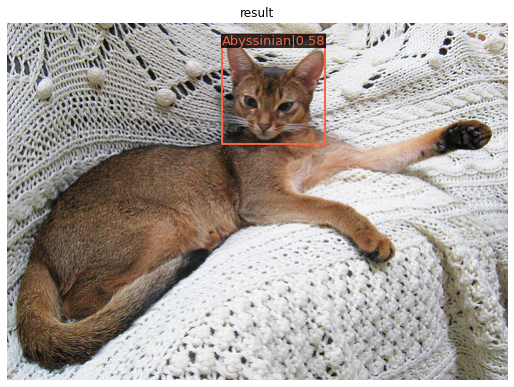

In [39]:
from mmdet.apis import show_result_pyplot

from mmdet.apis import init_detector, inference_detector
import mmcv

chechpoint_file = '/content/gdrive/MyDrive/pet_work_dir/epoch_5.pth'
model_ckpt = init_detector(cfg, chechpoint_file, device='cuda:0')

# BGR
img = cv2.imread('/content/data/images/Abyssinian_88.jpg')

result = inference_detector(model_ckpt, img)
show_result_pyplot(model_ckpt, img, result, score_thr=0.3)

### 여러개의 image inference 수행

In [55]:
val_df['img_path'] = '/content/data/images/' + val_df['img_name'] + '.jpg'
val_df.head()

img_name  ...                                 img_path
10   Abyssinian_10  ...   /content/data/images/Abyssinian_10.jpg
8   Abyssinian_108  ...  /content/data/images/Abyssinian_108.jpg
12  Abyssinian_111  ...  /content/data/images/Abyssinian_111.jpg
26  Abyssinian_124  ...  /content/data/images/Abyssinian_124.jpg
41  Abyssinian_138  ...  /content/data/images/Abyssinian_138.jpg

[5 rows x 6 columns]

In [57]:
val_df[val_df['img_path'].str.contains('Abyssinian')]['img_path'].values


array(['/content/data/images/Abyssinian_10.jpg',
       '/content/data/images/Abyssinian_108.jpg',
       '/content/data/images/Abyssinian_111.jpg',
       '/content/data/images/Abyssinian_124.jpg',
       '/content/data/images/Abyssinian_138.jpg',
       '/content/data/images/Abyssinian_149.jpg',
       '/content/data/images/Abyssinian_150.jpg',
       '/content/data/images/Abyssinian_164.jpg',
       '/content/data/images/Abyssinian_169.jpg',
       '/content/data/images/Abyssinian_176.jpg'], dtype=object)

In [58]:
val_paths = val_df[val_df['img_path'].str.contains('Abyssinian')]['img_path'].values
val_imgs = [cv2.imread(x) for x in val_paths]


In [60]:
type(val_imgs), len(val_imgs), val_imgs[0].shape

(list, 10, (500, 375, 3))

In [61]:
results = inference_detector(model_ckpt, val_imgs)

/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:323: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:360: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


In [64]:
type(results), len(results), results[0]

(list, 10, [array([[8.3587814e+01, 1.0206031e+02, 2.8603125e+02, 3.1337646e+02,
          1.5010574e-01]], dtype=float32),
  array([], shape=(0, 5), dtype=float32),
  array([], shape=(0, 5), dtype=float32),
  array([], shape=(0, 5), dtype=float32),
  array([], shape=(0, 5), dtype=float32),
  array([], shape=(0, 5), dtype=float32),
  array([], shape=(0, 5), dtype=float32),
  array([[7.7647110e+01, 1.0826368e+02, 2.9648679e+02, 3.0787134e+02,
          2.2586361e-01]], dtype=float32),
  array([], shape=(0, 5), dtype=float32),
  array([[7.5478104e+01, 9.4632286e+01, 2.8974423e+02, 3.0762982e+02,
          1.3442253e-01]], dtype=float32),
  array([], shape=(0, 5), dtype=float32),
  array([[7.6696205e+01, 1.1528755e+02, 2.8450330e+02, 3.1706918e+02,
          5.1703416e-02]], dtype=float32),
  array([], shape=(0, 5), dtype=float32),
  array([], shape=(0, 5), dtype=float32),
  array([], shape=(0, 5), dtype=float32),
  array([], shape=(0, 5), dtype=float32),
  array([], shape=(0, 5), dtype=fl

In [73]:
PET_CLASSES = pet_df['class_name'].unique().tolist()
labels_to_names_seq = {i:k for i, k in enumerate(PET_CLASSES)}

# model과 원본 이미지 array, filtering할 기준 class confidence score를 인자로 가지는 inference 시각화용 함수 생성. 
def get_detected_img(model, img_array,  score_threshold=0.3, is_print=True):
  # 인자로 들어온 image_array를 복사. 
  draw_img = img_array.copy()
  bbox_color=(0, 255, 0)
  text_color=(0, 0, 255)

  # model과 image array를 입력 인자로 inference detection 수행하고 결과를 results로 받음. 
  # results는 80개의 2차원 array(shape=(오브젝트갯수, 5))를 가지는 list. 
  results = inference_detector(model, img_array)

  # 80개의 array원소를 가지는 results 리스트를 loop를 돌면서 개별 2차원 array들을 추출하고 이를 기반으로 이미지 시각화 
  # results 리스트의 위치 index가 바로 COCO 매핑된 Class id. 여기서는 result_ind가 class id
  # 개별 2차원 array에 오브젝트별 좌표와 class confidence score 값을 가짐. 
  for result_ind, result in enumerate(results):
    # 개별 2차원 array의 row size가 0 이면 해당 Class id로 값이 없으므로 다음 loop로 진행. 
    if len(result) == 0:
      continue
    
    # 2차원 array에서 5번째 컬럼에 해당하는 값이 score threshold이며 이 값이 함수 인자로 들어온 score_threshold 보다 낮은 경우는 제외. 
    result_filtered = result[np.where(result[:, 4] > score_threshold)]
    
    # 해당 클래스 별로 Detect된 여러개의 오브젝트 정보가 2차원 array에 담겨 있으며, 이 2차원 array를 row수만큼 iteration해서 개별 오브젝트의 좌표값 추출. 
    for i in range(len(result_filtered)):
      # 좌상단, 우하단 좌표 추출. 
      left = int(result_filtered[i, 0])
      top = int(result_filtered[i, 1])
      right = int(result_filtered[i, 2])
      bottom = int(result_filtered[i, 3])
      caption = "{}: {:.4f}".format(labels_to_names_seq[result_ind], result_filtered[i, 4])
      cv2.rectangle(draw_img, (left, top), (right, bottom), color=bbox_color, thickness=2)
      cv2.putText(draw_img, caption, (int(left), int(top - 7)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, text_color, 1)
      if is_print:
        print(caption)

  return draw_img

Abyssinian: 0.5844


/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:323: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:360: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


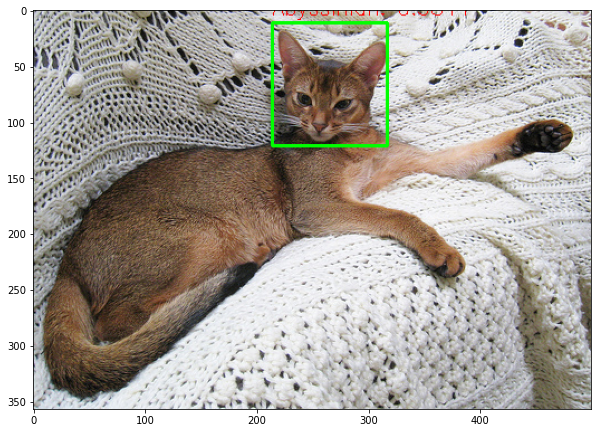

In [68]:
img_arr = cv2.imread('/content/data/images/Abyssinian_88.jpg')
detected_img = get_detected_img(model_ckpt, img_arr, score_threshold=0.3, is_print=True)
detected_img = cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(10,10))
plt.imshow(detected_img)

In [79]:
def show_deteced_images(model, img_arrays, n_cols=5):
  fig, axes = plt.subplots(1, n_cols, figsize=(22,6))
  for i in range(n_cols):
    detected_img = get_detected_img(model_ckpt, img_arrays[i], score_threshold=0.3, is_print=True)
    detected_img = cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(detected_img)

/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:323: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:360: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


Russian_Blue: 0.3324
British_Shorthair: 0.3153
Russian_Blue: 0.3353
Siamese: 0.3208
British_Shorthair: 0.3570
Russian_Blue: 0.3167
Abyssinian: 0.7604
British_Shorthair: 0.3577
Siamese: 0.3235
Siamese: 0.4392
Abyssinian: 0.6272
Abyssinian: 0.7638


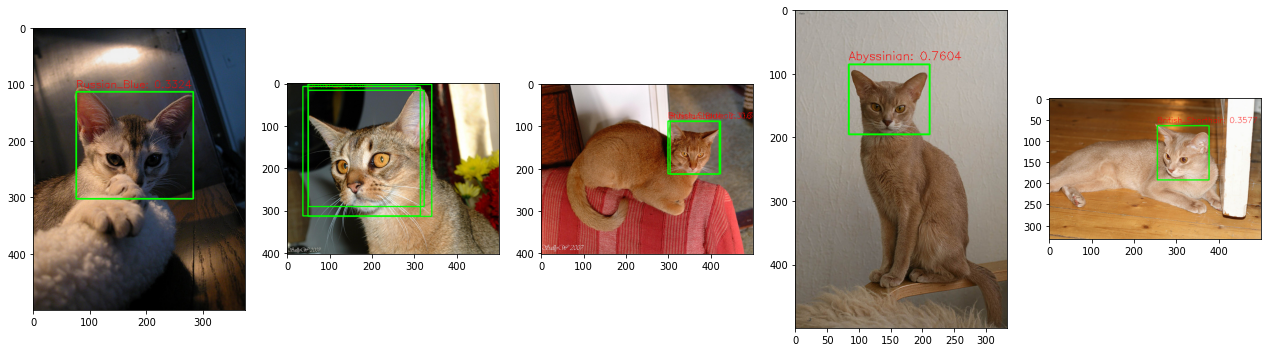

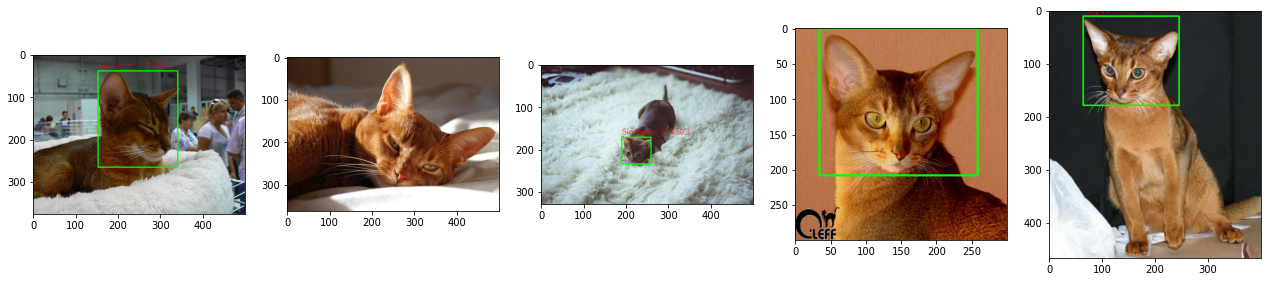

In [80]:
show_deteced_images(model_ckpt, val_imgs[:5], n_cols=5)
show_deteced_images(model_ckpt, val_imgs[5:10], n_cols=5)

In [81]:
val_df.head()

img_name  ...                                 img_path
10   Abyssinian_10  ...   /content/data/images/Abyssinian_10.jpg
8   Abyssinian_108  ...  /content/data/images/Abyssinian_108.jpg
12  Abyssinian_111  ...  /content/data/images/Abyssinian_111.jpg
26  Abyssinian_124  ...  /content/data/images/Abyssinian_124.jpg
41  Abyssinian_138  ...  /content/data/images/Abyssinian_138.jpg

[5 rows x 6 columns]

In [86]:
val_paths = val_df[val_df['img_path'].str.contains('pug')]['img_path'].values
val_imgs = [cv2.imread(x) for x in val_paths]

/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:323: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:360: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


pug: 0.8119
staffordshire_bull_terrier: 0.3333
pug: 0.9007
pug: 0.9131
pug: 0.9853
pug: 0.8683
pug: 0.8088
pug: 0.3053
boxer: 0.3999
pug: 0.5494
pug: 0.9622
american_pit_bull_terrier: 0.5975
pug: 0.5825


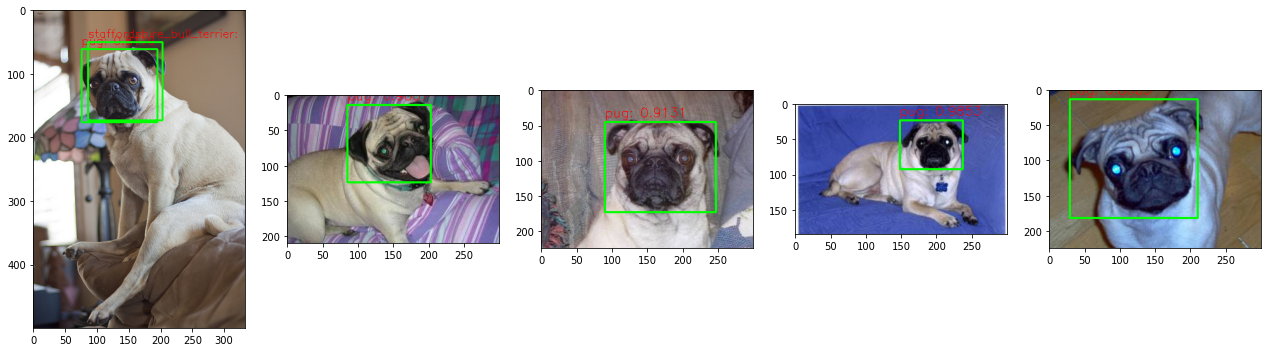

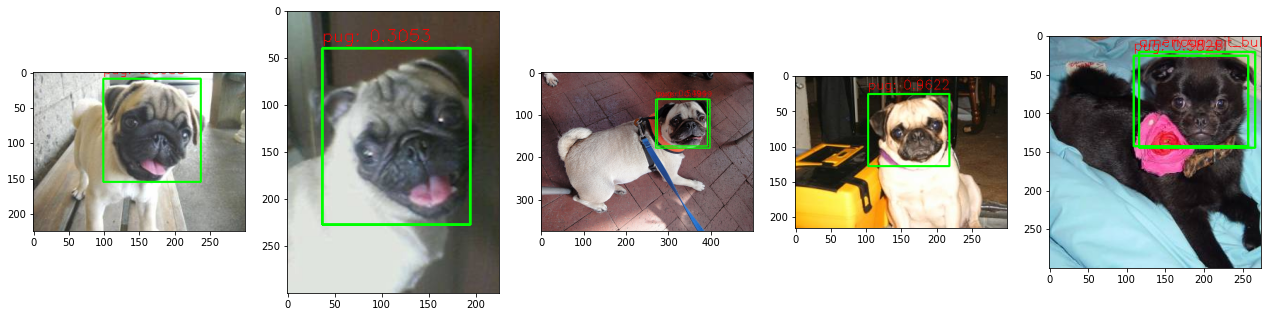

In [88]:
show_deteced_images(model_ckpt, val_imgs[:5],5)
show_deteced_images(model_ckpt, val_imgs[5:],5)